In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import geopandas as gpd


# Dataset loading
Loading the dataset, the pixel values of Sentinel2 and carbon values were already mergen in Qgis
The line used for outlier removal is commented

In [2]:
df = pd.read_csv ('input/df_merged_allbands.csv')

df=df.drop(columns=['id', 'fid'])   
df=df.dropna() 

#oulier removal
#df = df[df['Carb.m1'].between(df['Carb.m1'].quantile(.15), df['Carb.m1'].quantile(.85))] 

s2_sr_df=df
s2_sr_df.head()

,Carb.m1,B12,B11,B8A,B7,B6,B5,WVP,B8,B4,B3,B2,AOT
0,1.244373,1634,2388,2780,2488,2093,960,2078,2770,621,617,381,78
1,1.493248,1408,2169,3076,2808,2212,842,2189,2886,488,502,305,78
2,2.654662,1263,2075,3123,2869,2257,792,2198,2976,385,469,262,78
3,1.693730,1316,2063,3030,2802,2214,792,2198,2812,423,477,296,78
4,0.553055,1298,2032,3132,2888,2305,741,2338,2940,367,453,262,78


All the pixel band values were normalzied

In [3]:
s2_sr_df.iloc[:,1:]=preprocessing.normalize(s2_sr_df.iloc[:,1:])
s2_sr_df.head()

,Carb.m1,B12,B11,B8A,B7,B6,B5,WVP,B8,B4,B3,B2,AOT
0,1.244373,0.256752,0.375229,0.436825,0.390943,0.328876,0.150846,0.326519,0.435254,0.097579,0.096950,0.059867,0.012256
1,1.493248,0.213860,0.329448,0.467212,0.426506,0.335980,0.127891,0.332486,0.438353,0.074122,0.076249,0.046326,0.011847
2,2.654662,0.190976,0.313757,0.472223,0.433816,0.341277,0.119757,0.332355,0.449995,0.058215,0.070917,0.039617,0.011794
3,1.693730,0.203578,0.319135,0.468725,0.433455,0.342494,0.122518,0.340019,0.435002,0.065436,0.073789,0.045790,0.012066
4,0.553055,0.194906,0.305123,0.470298,0.433659,0.346116,0.111268,0.351072,0.441467,0.055108,0.068022,0.039342,0.011712


# Caluculatiing spectral indices
The same spectral indices were used as in Mangroves hackathon

In [4]:
 # NDVI
s2_sr_df['NDVI']=(s2_sr_df["B8"] - s2_sr_df["B4"]) / (s2_sr_df["B8"] + s2_sr_df["B4"])
# GNDVI
s2_sr_df['GNDVI']=(s2_sr_df["B8"] - s2_sr_df["B3"]) / (s2_sr_df["B8"] + s2_sr_df["B3"]) 
# Simple ratio
s2_sr_df['SR'] = (s2_sr_df ["B8"])/(s2_sr_df["B3"])

# Simple Ratio NIR/RED Difference Vegetation Index
s2_sr_df['DVI'] = s2_sr_df["B8"]/s2_sr_df["B4"]
# Red edge simple ratio
s2_sr_df['SRre'] = s2_sr_df ["B8"]/s2_sr_df["B5"] 

# Enhanced Vegetation Index
s2_sr_df['EVI'] = 2.5*(s2_sr_df["B8"] - s2_sr_df["B4"]) / (s2_sr_df["B8"] + 6*s2_sr_df["B4"]- 7.5*s2_sr_df["B2"] + 1) 
# Wide Dynamic Range Vegetation Index
s2_sr_df['WDRVI'] =(0.1*s2_sr_df["B8"] - s2_sr_df["B4"]) / (0.1*s2_sr_df["B8"] + s2_sr_df["B4"])
# Aerosol free vegetation index 1600
# s2_sr_df['AFRI1600'] = s2_sr_df["B8"] - 0.66*s2_sr_df["B11"] / (s2_sr_df["B8"] + 0.66*s2_sr_df["B11"]) 
# Aerosol free vegetation index 2100
# s2_sr_df['AFRI2100'] = s2_sr_df["B8"] - 0.5*s2_sr_df["B12"] / (s2_sr_df["B8"] + 0.56*s2_sr_df["B12"]) 

#Canopy Chlorophyll Content Index
s2_sr_df['CCCI']=((s2_sr_df["B8"] - s2_sr_df["B5"]) / (s2_sr_df["B8"] + s2_sr_df["B5"]))/((s2_sr_df["B8"] - s2_sr_df["B4"]) / (s2_sr_df["B8"] + s2_sr_df["B4"])) 
# Chlorophyll vegetation index
s2_sr_df['CVI']= s2_sr_df["B8"]*s2_sr_df["B4"]/(s2_sr_df["B3"])**2  
# Chlorophyll index green
s2_sr_df['CIgreen'] = s2_sr_df["B8"]/s2_sr_df["B3"] - 1 
# Green leaf index
s2_sr_df['GLI'] = (2*s2_sr_df["B3"]-s2_sr_df["B4"]-s2_sr_df["B2"])/(2*s2_sr_df["B3"]+s2_sr_df["B4"]+s2_sr_df["B2"])
# Leaf Chlorophyll Index
s2_sr_df['LCI'] = (s2_sr_df["B8A"]-s2_sr_df["B5"])/(s2_sr_df["B8A"]+s2_sr_df["B4"]) 

 # Normalized Difference Salinity Index
# s2_sr_df['NDSI']=(s2_sr_df["B11"] - s2_sr_df["B12"]) / (s2_sr_df["B11"] + s2_sr_df["B12"])
 # Soil Composition Index
# s2_sr_df['SCI']=(s2_sr_df["B11"] - s2_sr_df["B8"]) / (s2_sr_df["B11"] + s2_sr_df["B8"])

data = s2_sr_df.iloc[:,np.r_[slice(0,s2_sr_df.shape[1])]]
data.head()

,Carb.m1,B12,B11,B8A,B7,B6,B5,WVP,B8,B4,...,SR,DVI,SRre,EVI,WDRVI,CCCI,CVI,CIgreen,GLI,LCI
0,1.244373,0.256752,0.375229,0.436825,0.390943,0.328876,0.150846,0.326519,0.435254,0.097579,...,4.489465,4.460548,2.885417,0.537110,-0.383073,0.765704,4.518570,3.489465,0.103757,0.535137
1,1.493248,0.213860,0.329448,0.467212,0.426506,0.335980,0.127891,0.332486,0.438353,0.074122,...,5.749004,5.913934,3.427553,0.592964,-0.256760,0.771438,5.588673,4.749004,0.117418,0.626824
2,2.654662,0.190976,0.313757,0.472223,0.433816,0.341277,0.119757,0.332355,0.449995,0.058215,...,6.345416,7.729870,3.757576,0.652027,-0.128040,0.751870,5.208923,5.345416,0.183596,0.664481
3,1.693730,0.203578,0.319135,0.468725,0.433455,0.342494,0.122518,0.340019,0.435002,0.065436,...,5.895178,6.647754,3.550505,0.622502,-0.201363,0.758970,5.227800,4.895178,0.140466,0.648132
4,0.553055,0.194906,0.305123,0.470298,0.433659,0.346116,0.111268,0.351072,0.441467,0.055108,...,6.490066,8.010899,3.967611,0.653935,-0.110439,0.767810,5.257957,5.490066,0.180456,0.683338


# Train/test split


In [5]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,1:]
y = data.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.head()

,B12,B11,B8A,B7,B6,B5,WVP,B8,B4,B3,...,SR,DVI,SRre,EVI,WDRVI,CCCI,CVI,CIgreen,GLI,LCI
525,0.287845,0.424253,0.424109,0.375990,0.312121,0.177591,0.309664,0.403156,0.115311,0.102451,...,3.935120,3.496241,2.270138,0.453825,-0.481894,0.699597,4.429091,2.935120,0.055845,0.457005
462,0.232059,0.353824,0.447533,0.414776,0.346085,0.145814,0.319133,0.432606,0.082789,0.092188,...,4.692654,5.225376,2.966825,0.579350,-0.313596,0.730504,4.214242,3.692654,0.141146,0.568934
118,0.230453,0.352669,0.458167,0.423001,0.332780,0.129423,0.316062,0.441305,0.068026,0.069323,...,6.365904,6.487288,3.409800,0.615347,-0.213056,0.745639,6.246792,5.365904,0.104478,0.624760
638,0.186341,0.298737,0.450391,0.435199,0.332348,0.134983,0.311778,0.496372,0.060231,0.075424,...,6.581105,8.241071,3.677291,0.719739,-0.096427,0.730501,5.255499,5.581105,0.174869,0.617694
620,0.358407,0.432844,0.379277,0.346581,0.311798,0.233605,0.297189,0.369260,0.147481,0.122716,...,3.009070,2.503774,1.580703,0.339254,-0.599517,0.524288,3.616343,2.009070,0.032183,0.276545


# Correlation calculation

In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


class MidpointNormalize(mpl.colors.Normalize):
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))))
        normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))))
        normalized_mid = 0.5
        x, y = [self.vmin, self.midpoint, self.vmax], [normalized_min, normalized_mid, normalized_max]
        return np.ma.masked_array(np.interp(value, x, y))


norm = MidpointNormalize(vmin=-1, vmax=1, midpoint=0)
cmap = 'RdBu_r'

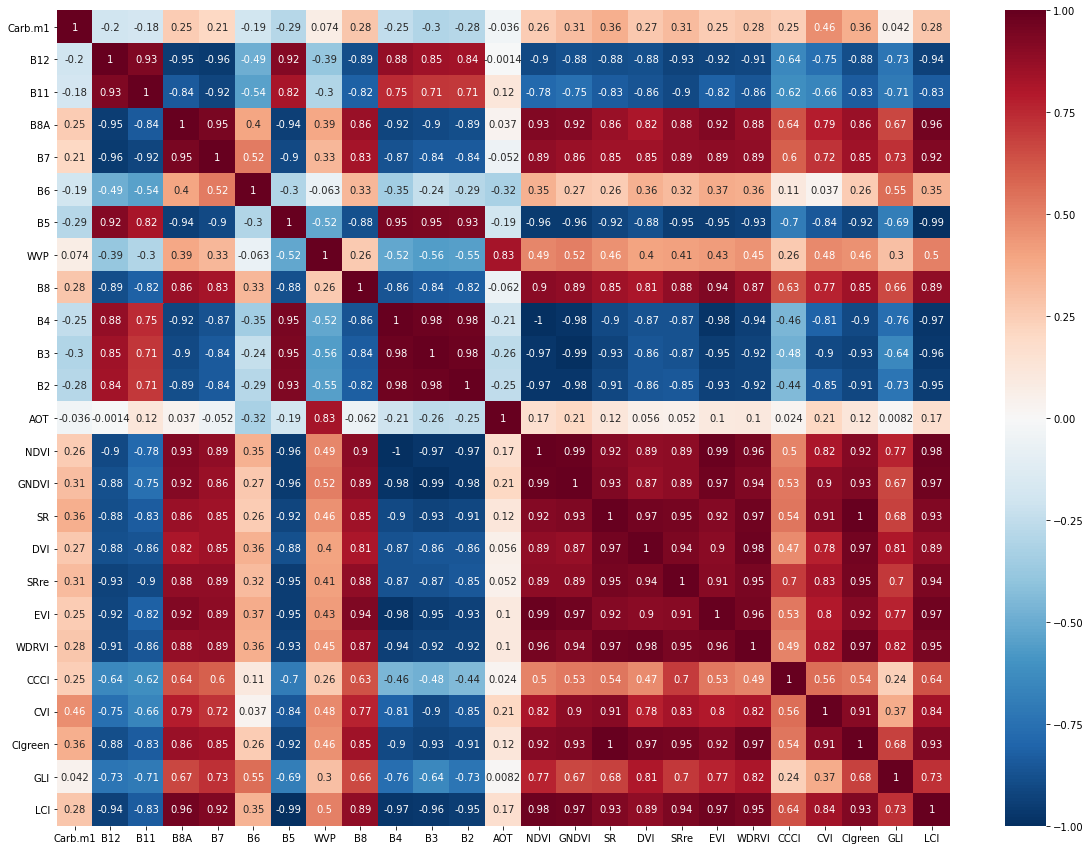

In [7]:
plt.figure(figsize=(20,15))
cor = pd.concat([y_train, X_train], axis=1).corr() # method: 'pearson','spearman'
sns.heatmap(cor, annot=True, cmap=cmap, norm = norm)
plt.show()

Sort the features according to correlation coefficient with carbon values

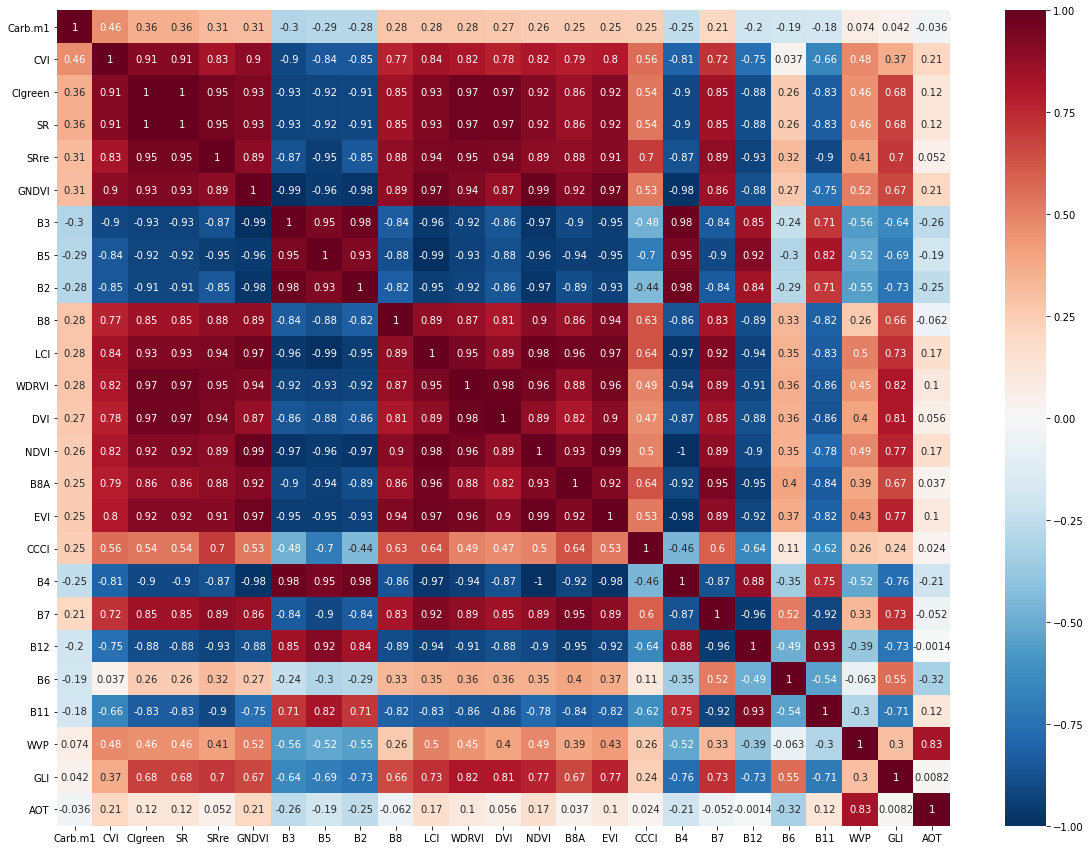

In [8]:
cor['carb']=abs(cor['Carb.m1'])
cor_s = cor.sort_values('carb', ascending=False)

plt.figure(figsize=(20,15))
sns.heatmap(cor_s[cor_s.index], annot=True, cmap=cmap, norm = norm)
plt.show()

The spectral indices and bands that cooralte with carbon values the most. Variable Num_features also contols how many features are going to be used as input for the prediction method.

In [9]:
Num_features = 10

feat = cor_s.index[1:(Num_features+2)].to_list()
feat

['CVI',
 'CIgreen',
 'SR',
 'SRre',
 'GNDVI',
 'B3',
 'B5',
 'B2',
 'B8',
 'LCI',
 'WDRVI']

In [10]:
from sklearn.ensemble import RandomForestRegressor

#model = RandomForestRegressor(max_depth=6, random_state=0)
model = RandomForestRegressor()
model.fit(X_train[feat], y_train)

print('Score for model on training data:',model.score(X_train[feat], y_train))
print('Score for model on testig data:',model.score(X_test[feat], y_test))

Score for model on training data: 0.9034693189118485
Score for model on testig data: 0.28570229317285345


In [11]:
pred_train = model.predict(X_train[feat])
pred_test = model.predict(X_test[feat])


Let's print the true carbon values and the predictions of our algorithm

In [12]:
res_test = pd.DataFrame(y_test)
res_test['Predicted_values']=pred_test
res_test.head()

,Carb.m1,Predicted_values
575,0.311093,1.951880
259,1.036978,0.616518
388,0.311093,0.179121
495,1.244373,0.898215
70,17.918971,1.522888


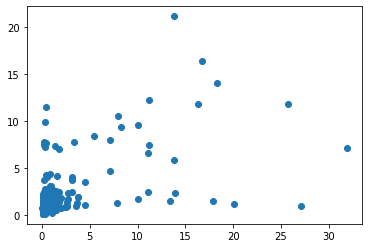

In [13]:
plt.scatter(res_test.iloc[:,0],res_test.iloc[:,1])

In [14]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

Mean Absolute Error: 1.6831521216021716
Mean Squared Error: 14.682083213067374
Root Mean Squared Error: 3.8317206595819813


# Ackron site

Let's read the csv file with points and band values that had been created in Qgis.

In [15]:
df_Ackron=pd.read_csv ('input/df_merged_allbands_Ackron.csv')
df_Ackron=df_Ackron.drop(columns=['id', 'fid'])   
df_Ackron=df_Ackron.dropna() 
s2_sr_df=df_Ackron
s2_sr_df.head()

,WVP,B8,B4,B3,B2,AOT,B12,B11,B8A,B7,B6,B5
0,1511,2346,119,124,39,204,397,899,2487,2165,1598,424
1,1621,2724,332,364,150,204,449,957,2746,2365,1891,710
2,1769,3702,521,623,362,204,803,1495,3085,2833,2299,860
3,1575,2428,122,140,19,204,422,923,2483,2246,1719,437
4,1726,2676,321,353,160,204,561,1127,2723,2386,1879,654


In [16]:
s2_sr_df.iloc[:,1:]=preprocessing.normalize(s2_sr_df.iloc[:,1:])
s2_sr_df.head()

,WVP,B8,B4,B3,B2,AOT,B12,B11,B8A,B7,B6,B5
0,1511,0.522652,0.026511,0.027625,0.008689,0.045448,0.088445,0.200283,0.554064,0.482328,0.356009,0.094460
1,1621,0.533624,0.065038,0.071307,0.029385,0.039963,0.087958,0.187473,0.537933,0.463297,0.370441,0.139087
2,1769,0.578261,0.081381,0.097314,0.056545,0.031865,0.125431,0.233523,0.481884,0.442521,0.359109,0.134334
3,1575,0.525381,0.026399,0.030294,0.004111,0.044142,0.091314,0.199723,0.537282,0.485999,0.371965,0.094560
4,1726,0.523732,0.062824,0.069087,0.031314,0.039926,0.109796,0.220570,0.532931,0.466975,0.367748,0.127997


Calculate the same spectral indices

In [17]:
s2_sr_df=df_Ackron


#Caluculatiing spectral indices
# NDVI
s2_sr_df['NDVI']=(s2_sr_df["B8"] - s2_sr_df["B4"]) / (s2_sr_df["B8"] + s2_sr_df["B4"])
# GNDVI
s2_sr_df['GNDVI']=(s2_sr_df["B8"] - s2_sr_df["B3"]) / (s2_sr_df["B8"] + s2_sr_df["B3"]) 
# Simple ratio
s2_sr_df['SR'] = (s2_sr_df ["B8"])/(s2_sr_df["B3"])

# Simple Ratio NIR/RED Difference Vegetation Index
s2_sr_df['DVI'] = s2_sr_df["B8"]/s2_sr_df["B4"]
# Red edge simple ratio
s2_sr_df['SRre'] = s2_sr_df ["B8"]/s2_sr_df["B5"] 

# Enhanced Vegetation Index
s2_sr_df['EVI'] = 2.5*(s2_sr_df["B8"] - s2_sr_df["B4"]) / (s2_sr_df["B8"] + 6*s2_sr_df["B4"]- 7.5*s2_sr_df["B2"] + 1) 
# Wide Dynamic Range Vegetation Index
s2_sr_df['WDRVI'] =(0.1*s2_sr_df["B8"] - s2_sr_df["B4"]) / (0.1*s2_sr_df["B8"] + s2_sr_df["B4"])
# Aerosol free vegetation index 1600
# s2_sr_df['AFRI1600'] = s2_sr_df["B8"] - 0.66*s2_sr_df["B11"] / (s2_sr_df["B8"] + 0.66*s2_sr_df["B11"]) 
# Aerosol free vegetation index 2100
# s2_sr_df['AFRI2100'] = s2_sr_df["B8"] - 0.5*s2_sr_df["B12"] / (s2_sr_df["B8"] + 0.56*s2_sr_df["B12"]) 

#Canopy Chlorophyll Content Index
s2_sr_df['CCCI']=((s2_sr_df["B8"] - s2_sr_df["B5"]) / (s2_sr_df["B8"] + s2_sr_df["B5"]))/((s2_sr_df["B8"] - s2_sr_df["B4"]) / (s2_sr_df["B8"] + s2_sr_df["B4"])) 
# Chlorophyll vegetation index
s2_sr_df['CVI']= s2_sr_df["B8"]*s2_sr_df["B4"]/(s2_sr_df["B3"])**2  
# Chlorophyll index green
s2_sr_df['CIgreen'] = s2_sr_df["B8"]/s2_sr_df["B3"] - 1 
# Green leaf index
s2_sr_df['GLI'] = (2*s2_sr_df["B3"]-s2_sr_df["B4"]-s2_sr_df["B2"])/(2*s2_sr_df["B3"]+s2_sr_df["B4"]+s2_sr_df["B2"])
# Leaf Chlorophyll Index
s2_sr_df['LCI'] = (s2_sr_df["B8A"]-s2_sr_df["B5"])/(s2_sr_df["B8A"]+s2_sr_df["B4"]) 

 # Normalized Difference Salinity Index
# s2_sr_df['NDSI']=(s2_sr_df["B11"] - s2_sr_df["B12"]) / (s2_sr_df["B11"] + s2_sr_df["B12"])
 # Soil Composition Index
# s2_sr_df['SCI']=(s2_sr_df["B11"] - s2_sr_df["B8"]) / (s2_sr_df["B11"] + s2_sr_df["B8"])

Use the model created with Bardsley data to predict carbon values of Ackron site

In [18]:
data_Ackron= s2_sr_df.iloc[:,np.r_[slice(0,s2_sr_df.shape[1])]]
pred_test_Ackron= model.predict(data_Ackron[feat])
pred_test_Ackron

array([11.01417714, 13.82191074,  2.13865774, 11.01417714, 14.51297115,
       11.19115464, 11.11428004, 11.19115464, 11.11428004, 10.9201963 ,
        7.7599884 , 11.22074306, 11.22074306, 11.22074306, 11.22074306,
       11.22074306, 16.20110999,  9.99597885, 13.46880421, 15.42568794,
       11.22074306, 10.53902008, 11.22074306, 10.48877506, 11.22074306,
       14.5386867 , 10.74490115, 10.37200885, 11.22074306, 11.22074306,
       11.22074306, 11.11428004, 12.22374473, 13.35598106, 12.17424634,
        7.72177272,  3.81421995, 10.46647486, 11.47463896, 10.37200885,
       11.53258236, 11.22074306, 11.22074306, 11.22074306, 11.22074306,
       10.37968333,  3.2539314 , 11.22074306, 11.22074306, 14.19299737,
       15.31382319, 16.77974514,  3.19760598,  5.18740576, 11.22074306])

To visulazie data in Qgis, geopandas were imported and used to save the predicted values alongside their geometries.

In [19]:
gdf = gpd.read_file(r'/home/nadja/Desktop/Bardsley/df_merged_allbands_Ackron.gpkg')
gdf['pred']=pred_test_Ackron
gdf.head()

/home/nadja/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,id,WVP,B8,B4,B3,B2,AOT,B12,B11,B8A,B7,B6,B5,geometry,pred
0,1,1511.0,2346.0,119.0,124.0,39.0,204.0,397.0,899.0,2487.0,2165.0,1598.0,424.0,POINT (448369.329 6489978.091),11.014177
1,2,1621.0,2724.0,332.0,364.0,150.0,204.0,449.0,957.0,2746.0,2365.0,1891.0,710.0,POINT (448617.131 6489946.457),13.821911
2,3,1769.0,3702.0,521.0,623.0,362.0,204.0,803.0,1495.0,3085.0,2833.0,2299.0,860.0,POINT (448457.202 6489487.758),2.138658
3,4,1575.0,2428.0,122.0,140.0,19.0,204.0,422.0,923.0,2483.0,2246.0,1719.0,437.0,POINT (448864.934 6489310.254),11.014177
4,5,1726.0,2676.0,321.0,353.0,160.0,204.0,561.0,1127.0,2723.0,2386.0,1879.0,654.0,POINT (448748.941 6489276.862),14.512971


In [20]:
# gdf.to_file("/home/nadja/Desktop/Bardsley/package1.gpkg", driver="GPKG")